In [18]:
# standard libs
import os
import sys

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import dataset
import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
path_data_france_age = os.path.join('..', 'data', 'all_age.csv')
# path_data_france_all = os.path.join('..', 'data', 'all.csv')

data_france_age = pd.read_csv(path_data_france_age)
# data_france_all = pd.read_csv(path_data_france_all)


In [5]:
data_france_age_sample = data_france_age.sample(frac=.1)
# data_france_all_sample = data_france_all.sample(frac=.1)

## Mitigate dataset imbalance / skewness

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


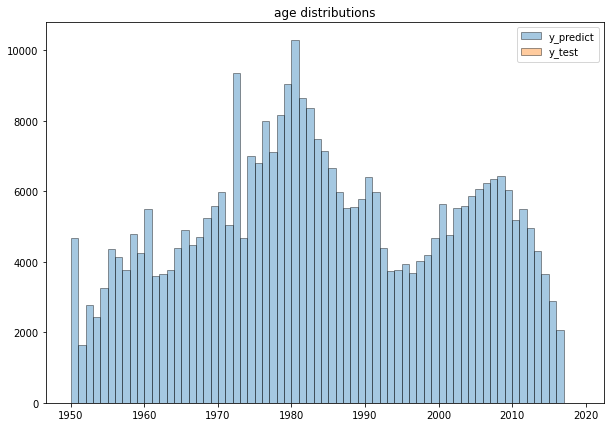

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


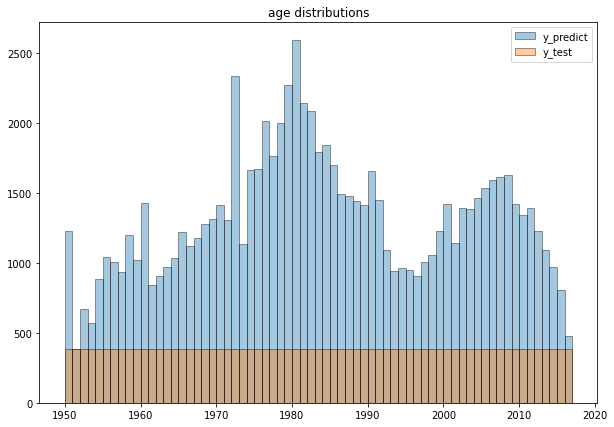

In [25]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier

predictor = AgePredictor(
    model=xgboost.XGBRegressor(),
    df=data_france_age,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1950, undersample_skewed_distribution]
)

MAE: 16.877650934628576 y
RMSE: 20.532638841850954 y
R2: -0.1272440048392689


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


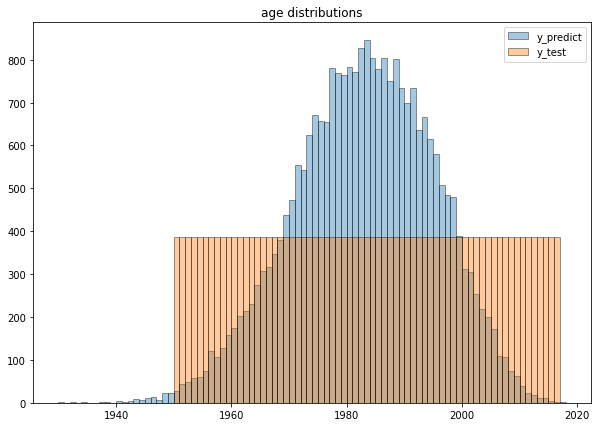

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

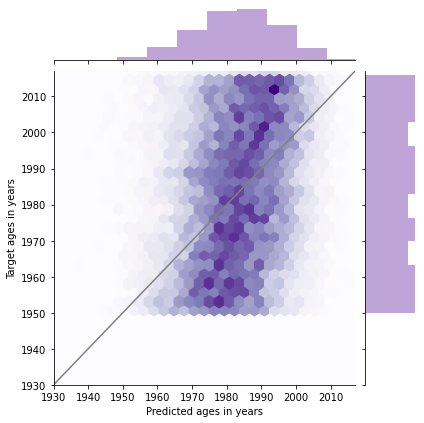

invalid value encountered in true_divide


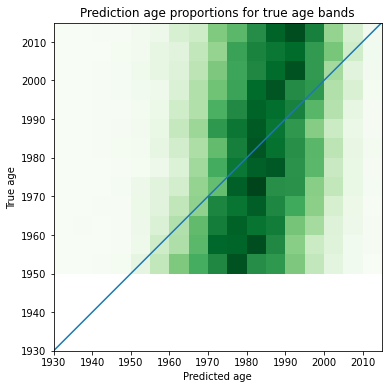

In [26]:
predictor.evaluate_regression()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


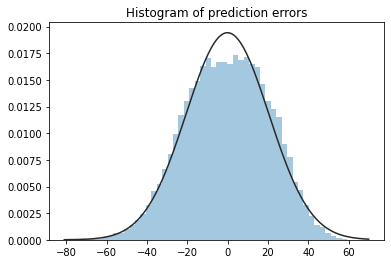

Excess kurtosis of normal distribution (should be 0): [-0.44001529]
Skewness of normal distribution (should be 0): [-0.09681301]


In [27]:
visualizations.plot_prediction_error_histogram(predictor.y_test, predictor.y_predict)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


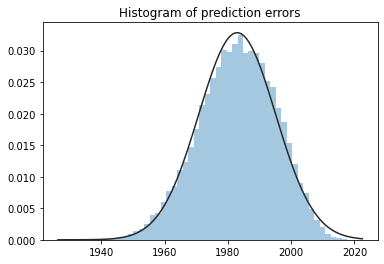

Excess kurtosis of normal distribution (should be 0): [-0.20644641]
Skewness of normal distribution (should be 0): [-0.2253664]


In [28]:
visualizations.plot_prediction_error_histogram(np.zeros_like(predictor.y_predict), predictor.y_predict)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[13:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.22      0.04      0.06       549
           1       0.52      0.73      0.61      2628
           2       0.48      0.34      0.40      1664
           3       0.46      0.48      0.47      2561
           4       0.48      0.50      0.49      2792
           5       0.48      0.40      0.44      2104

    accuracy                           0.49     12298
   macro avg       0.44      0.41      0.41     12298
weighted avg       0.47      0.49      0.47     12298



`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


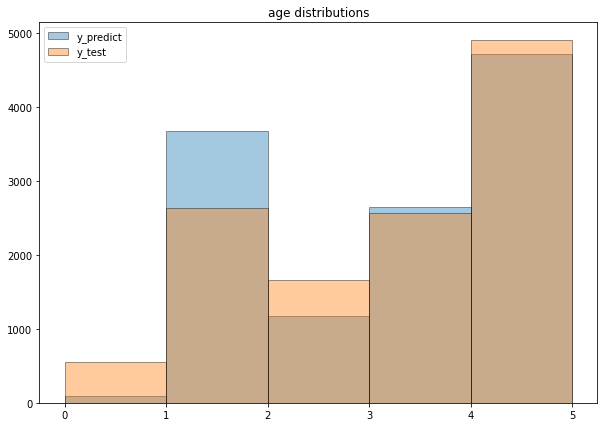

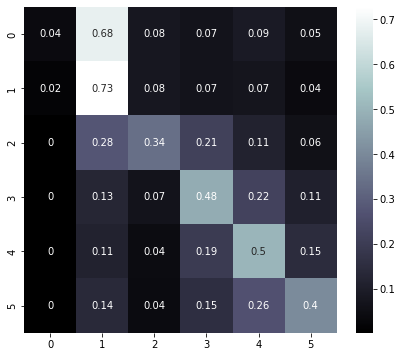

In [ ]:
classifier = AgePredictor(
    model=xgboost.XGBClassifier(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, categorize_age_EHS]
)
classifier.evaluate_classification()

              precision    recall  f1-score   support

           0       0.22      0.04      0.06       549
           1       0.52      0.73      0.61      2628
           2       0.48      0.34      0.40      1664
           3       0.46      0.48      0.47      2561
           4       0.48      0.50      0.49      2792
           5       0.48      0.40      0.44      2104

    accuracy                           0.49     12298
   macro avg       0.44      0.41      0.41     12298
weighted avg       0.47      0.49      0.47     12298



`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


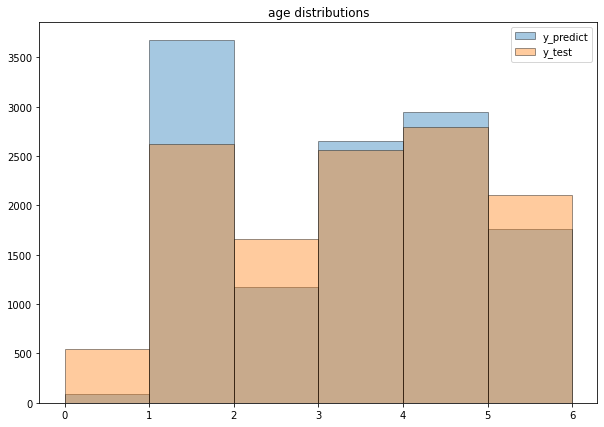

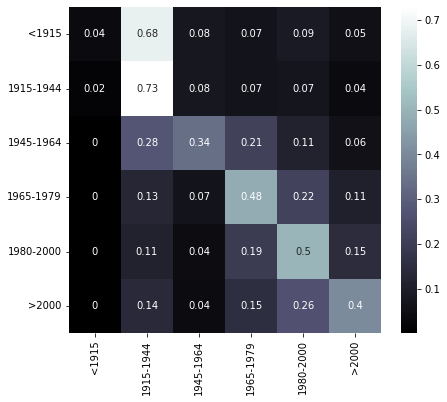

In [ ]:
classifier.evaluate_classification()